In [1]:
from scipy.io import loadmat
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
import torch
from tqdm import tqdm
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D
import copy

# Import Dataset

In [3]:
with open('../data/02_interim/bmodes_steatosis_assessment_IJCARS.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [4]:
M, N= 434, 636 # ultrasound image dimension

In [9]:
def create_cumul_var_graph(pca, J= None):
    ratio = pca.explained_variance_ratio_
    cumulative = np.cumsum(ratio)
    n_components = np.arange(0, len(cumulative))
    plt.plot(n_components, cumulative)
    if J is None:
        plt.title("Cumulative Explained Variance by number of components")
    else:
        plt.title(f"Cumulative Explained Variance by number of components where J ={J}")
    plt.ylabel("Cumulative Ratio")
    plt.xlabel("Number of components")
    

## 1. Visualization of Raw US images (No transformation)

In [5]:
# Reshape the data appropriately
data = df['img'].iloc[0].view(1,M*N)
for i in tqdm(range(1,len(df['img']))):
    data = torch.cat([data,df['img'].iloc[i].view(1,M*N)])

100%|██████████| 549/549 [01:36<00:00,  5.70it/s]


[0.235608   0.30601744 0.34721612 0.37858369 0.40738176 0.43016387
 0.45020239 0.46865764 0.48523594 0.50040584 0.51457536 0.52759443
 0.53980815 0.55134234 0.56191677 0.57210884 0.58175053 0.59106104
 0.60009418 0.60888136 0.61716257 0.62531617 0.63331302 0.64110027
 0.64856104 0.65576257 0.66278081 0.66970402 0.67629611 0.68265339
 0.68896456 0.69515814 0.70109501 0.70695334 0.71278764 0.71838092
 0.7238078  0.72910244 0.73431919 0.73950481 0.74464372 0.74948215
 0.75428352 0.75901026 0.76367938 0.76825429 0.77271593 0.77695174
 0.78113053 0.78515478 0.78909202 0.79286303 0.79646097 0.79986721
 0.80304386 0.80495777 0.80674479 0.80832758 0.80984856 0.81135207
 0.81277054 0.81418397 0.81551297 0.81678345 0.81802919 0.81925174
 0.82044743 0.82162126 0.82277437 0.82391665 0.82505418 0.82616797
 0.82727037 0.82836092 0.8294361  0.8304934  0.83154604 0.83259182
 0.83361998 0.83462553 0.83562327 0.83661009 0.83758277 0.83854011
 0.83949192 0.84043705 0.84136867 0.84227814 0.84318046 0.8440

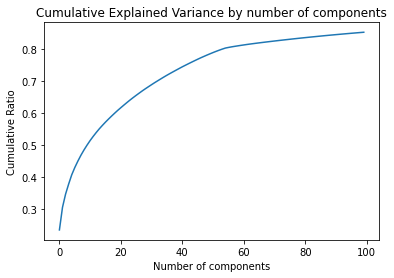

In [8]:
pca = PCA(n_components=100)
pca.fit(data)
pca_data = pca.transform(data)
create_cumul_var_graph(pca)
plt.savefig("PCAcumul-base.png")
print(pca.explained_variance_ratio_.cumsum())

## 2. GLOBAL PCA - Scattering Transform

In [ ]:
for J in range(2,7):
    with open(f'../data/03_features/scattering_features_J_{J}.pickle', 'rb') as handle:
        scatter_dict = pickle.load(handle)
        df_scattering = scatter_dict['df']
        scattering_params = {'J':scatter_dict['J'],
                         'M':scatter_dict['M'],
                         'N':scatter_dict['N']}
    #Transforming df_scattering to a numpy array excluding class and id
    df_scattering.drop("class", inplace = True, axis=1)
    df_scattering.drop("id", inplace=True, axis=1)
    df_scattering = df_scattering.to_numpy()
    pca_s = PCA(n_components=100)
    pca_data_s = pca_s.fit_transform(df_scattering, J)


# Local PCA - Scattering Transform

In [ ]:
for J in range(2,7):
    with open(f'../data/03_features/scattering_features_J_{J}.pickle', 'rb') as handle:
        scatter_dict = pickle.load(handle)
        df_scattering = scatter_dict['df']
        scattering_params = {'J':scatter_dict['J'],
                         'M':scatter_dict['M'],
                         'N':scatter_dict['N']}
    #Transforming df_scattering to a numpy array excluding class and id
    df_scattering.drop("class", inplace = True, axis=1)
    df_scattering.drop("id", inplace=True, axis=1)
    df_scattering = df_scattering.to_numpy()
    pca_s = PCA(n_components=100)
    pca_data_s = pca_s.fit_transform(df_scattering, J)
